# Classification models

Classification of ML tasks and models: https://illustrated-machine-learning.github.io/#/machine-learning/categorization

In this lecture we are going to learn how to use the classification models in scikit-learn. For this purpose we are going to use two syntetic datasets, which will help us visualize decision boundaries of these models and gain better understanding of how they work. 

In [1]:
import graphviz 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

from utils import visualize_decision_boundary, get_linearly_separable_syntetic_dataset, get_non_linearly_separable_syntetic_dataset, get_test_dataset

random_state = 42

print("Setup complete!")

Setup complete!


## Datasets

We will use two datasets:
- linenarly separable dataset (linear models can separate data with high accuracy)
- non-linearly separable dataset (require more complex models to separate data)

In [2]:
x_linear, y_linear = get_linearly_separable_syntetic_dataset()
print("Linearly separable dataset")
print(f"x shape: {x_linear.shape}")
print(f"y shape: {y_linear.shape}")
print(f"Instances of class 0: {np.sum(y_linear == 0)}")
print(f"Instnaces of class 1: {np.sum(y_linear == 1)}")
# concatenate x and y
data_linear = np.concatenate((x_linear, y_linear.reshape(-1, 1)), axis=1)
# convert to dataframe
data_linear = pd.DataFrame(data_linear, columns=["x1", "x2", "class"])
data_linear.head()

Linearly separable dataset
x shape: (117, 2)
y shape: (117,)
Instances of class 0: 59
Instnaces of class 1: 58


,x1,x2,class
0,0.324179,0.165434,0.0
1,0.361922,0.580757,0.0
2,0.141462,0.141466,0.0
3,0.594803,0.391859,0.0
4,0.082631,0.335640,0.0


<Axes: title={'center': 'Linearly Separable Dataset'}, xlabel='x1', ylabel='x2'>

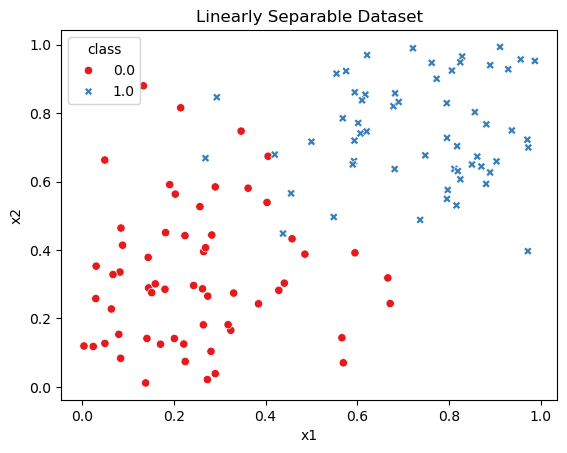

In [3]:
# visualize dataset
# create scatter plot for samples from each class
plt.title("Linearly Separable Dataset")
sns.scatterplot(x="x1", y="x2", hue='class', data=data_linear, style="class", palette="Set1")

In [4]:
x_nonlin, y_nonlin = get_non_linearly_separable_syntetic_dataset()
print(f"x shape: {x_nonlin.shape}")
print(f"y shape: {y_nonlin.shape}")
print(f"Instnaces of class 0: {np.sum(y_nonlin == 0)}")
print(f"Instnaces of class 1: {np.sum(y_nonlin == 1)}")
# concatenate x and y
data_nonlin = np.concatenate((x_nonlin, y_nonlin.reshape(-1, 1)), axis=1)
# convert to dataframe
data_nonlin = pd.DataFrame(data_nonlin, columns=["x1", "x2", "class"])
data_nonlin.head()

x shape: (251, 2)
y shape: (251,)
Instnaces of class 0: 140
Instnaces of class 1: 111


,x1,x2,class
0,0.201049,0.109396,0.0
1,0.109987,0.224570,0.0
2,0.224059,0.202888,0.0
3,0.510230,0.123135,0.0
4,0.435859,0.113504,0.0


<Axes: title={'center': 'Non-Linearly Separable Dataset'}, xlabel='x1', ylabel='x2'>

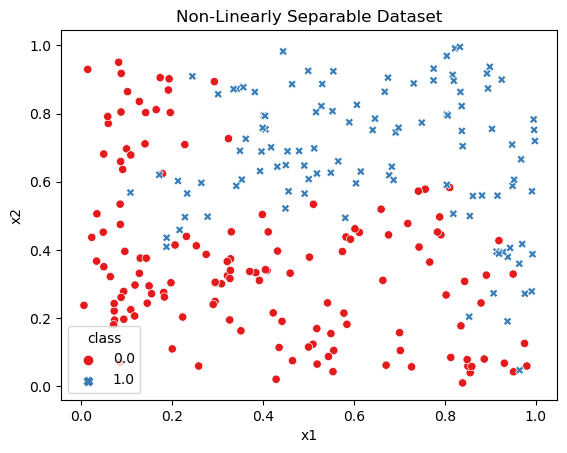

In [5]:
# visualize dataset
# create scatter plot for samples from each class
plt.title("Non-Linearly Separable Dataset")
sns.scatterplot(x="x1", y="x2", hue='class', data=data_nonlin, style="class", palette="Set1")

## 0R Baseline Model

Check materials: https://illustrated-machine-learning.github.io/#/machine-learning-engineering/introduction#baseline

Before we start with classification models, we will create a baseline model. Baseline model is a model that we will use to compare the performance of other models. It is usually the simplest model that we can create. In this case, we will use 0R model, which always predicts the most frequent class in the training set.

In [7]:
# define baseline model with configuration
baseline_model =  DummyClassifier(strategy="most_frequent", random_state=random_state)
# train baseline model for first dataset
baseline_model.fit(x_linear, y_linear)
# get predictions
y_pred = baseline_model.predict(x_linear)
# evaluate predictions
accuracy = accuracy_score(y_linear, y_pred)
print(f"Baseline model accuracy on linearly separable dataset: {accuracy}")

Baseline model accuracy on linearly separable dataset: 0.5042735042735043


In [8]:
# define baseline model with configuration
baseline_model =  DummyClassifier(strategy="most_frequent", random_state=random_state)
# train baseline model for second dataset
baseline_model.fit(x_nonlin, y_nonlin)
# get predictions
y_pred = baseline_model.predict(x_nonlin)
# evaluate predictions
accuracy = accuracy_score(y_nonlin, y_pred)
print(f"Baseline model accuracy on non-linearly separable dataset: {accuracy}")

Baseline model accuracy on non-linearly separable dataset: 0.5577689243027888


## Logistic Regression

Check materials: https://illustrated-machine-learning.github.io/#/machine-learning/linear-algorithms#logistic-regression

By default sckit-learn uses LBFGS (quasi-newton method) to optimize the loss function. For larger datasets consider changing solver to liblinear or saga.

Also, by default LogisticRegression uses L2 regularization as a penatly function. You can set it to None if you do not want to use any regularization.

In [9]:
# this will be our general function for training and visualizing decision boundaries of different models
def train_model(model, x, y, model_name="", conf="", ax=None, print_params=False):
    # fit the model
    model.fit(x, y)
    # make predictions
    y_pred = model.predict(x)
    # get accuracy of predictions
    accuracy = accuracy_score(y, y_pred)
    print(f"Model - {conf}")
    print(f"Accuracy: {accuracy}")
    if print_params:
        print_logistic_regreession_model_parameters(model)
    print("-"*50)
    visualize_decision_boundary(x, y, model, ax=ax, title=f"{model_name} - {conf}")

def print_logistic_regreession_model_parameters(model):
    # Get the coefficients (weights) of the model
    w = model.coef_
    # Get the intercept (bias) of the model
    b = model.intercept_
    print(f"Weights: {w}")
    print(f"Bias: {b}")


Model - No Regularization
Accuracy: 0.9572649572649573
Weights: [[16.3976302  14.47054114]]
Bias: [-15.91782533]
--------------------------------------------------
Model - L2 Regularization
Accuracy: 0.9572649572649573
Weights: [[3.72266001 3.19101835]]
Bias: [-3.570364]
--------------------------------------------------


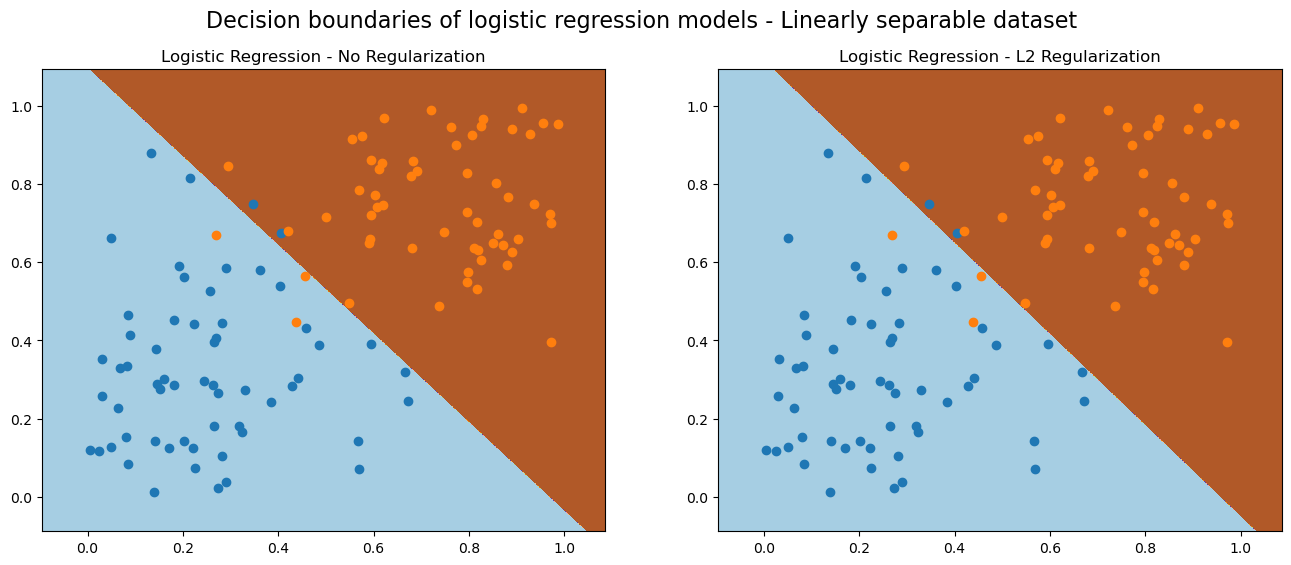

In [11]:
# define models
model1 = LogisticRegression(penalty=None, random_state=random_state)
model2 = LogisticRegression(penalty="l2", random_state=random_state)

# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of logistic regression models - Linearly separable dataset", fontsize=16)
# train model
train_model(model1, x_linear, y_linear, "Logistic Regression", "No Regularization", ax1, print_params=True)
train_model(model2, x_linear, y_linear, "Logistic Regression", "L2 Regularization", ax2, print_params=True)

Model - No Regularization
Accuracy: 0.8167330677290837
Weights: [[5.57552619 7.90061936]]
Bias: [-7.27360361]
--------------------------------------------------
Model - L2 Regularization
Accuracy: 0.8326693227091634
Weights: [[3.07367612 4.34849951]]
Bias: [-4.06290061]
--------------------------------------------------


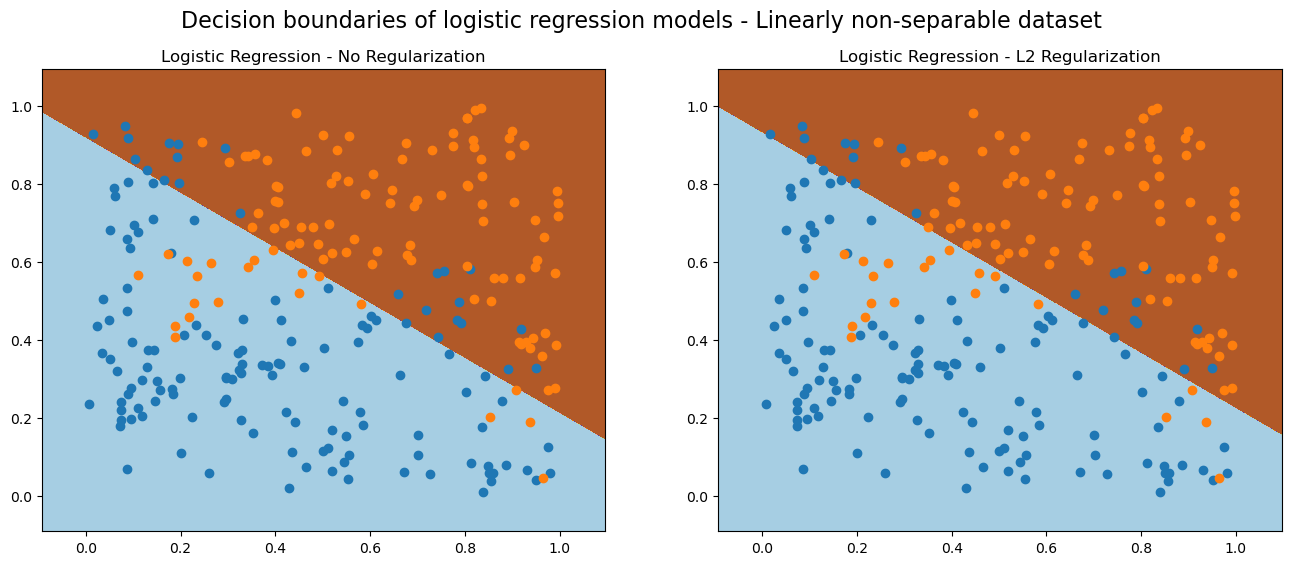

In [12]:
# define models
model1 = LogisticRegression(penalty=None, random_state=random_state)
model2 = LogisticRegression(penalty="l2", random_state=random_state)

# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of logistic regression models - Linearly non-separable dataset", fontsize=16)
# train model
train_model(model1, x_nonlin, y_nonlin, "Logistic Regression", "No Regularization", ax1, print_params=True)
train_model(model2, x_nonlin, y_nonlin, "Logistic Regression", "L2 Regularization", ax2, print_params=True)

## Naive Bayes

Check materials: https://scikit-learn.org/stable/modules/naive_bayes.html

This algorithm uses "naive" assumption that all features are independent. This is rarely true in real life, but the algorithm still performs well in many cases.
Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods. 
They require a small amount of training data to estimate the necessary parameters.

Model - Linearly separable dataset
Accuracy: 0.9572649572649573
--------------------------------------------------
Model - Linearly non-separable dataset
Accuracy: 0.8326693227091634
--------------------------------------------------


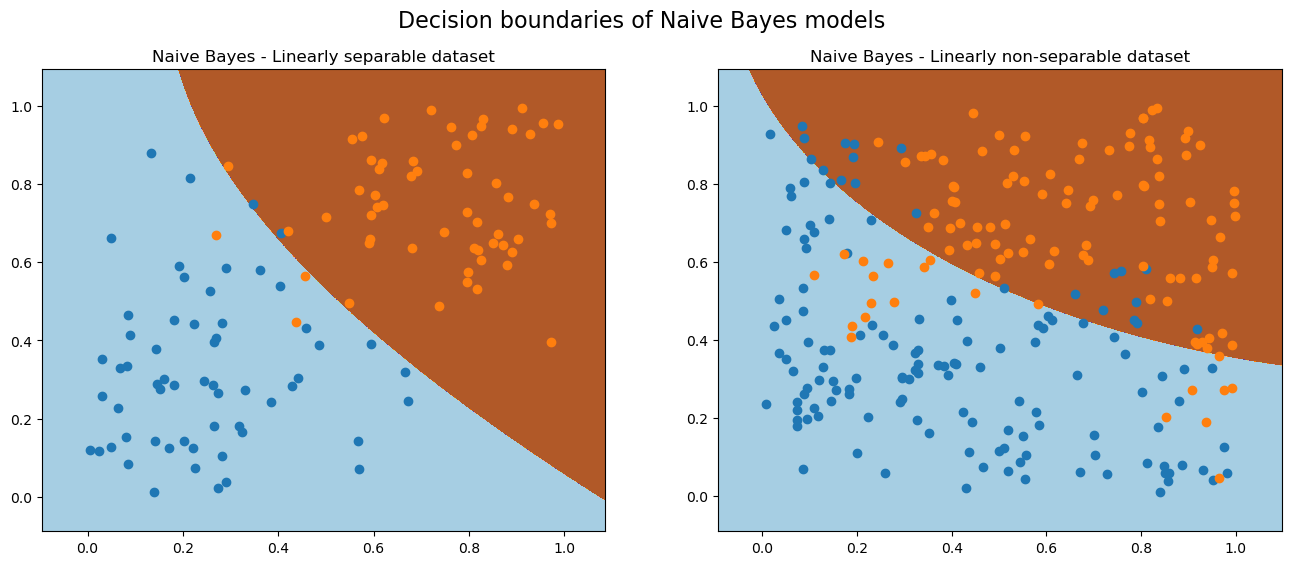

In [15]:
model = GaussianNB()
# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of Naive Bayes models", fontsize=16)
# train naive bayes models
train_model(model, x_linear, y_linear, "Naive Bayes", "Linearly separable dataset", ax1)
train_model(model, x_nonlin, y_nonlin, "Naive Bayes", "Linearly non-separable dataset", ax2)

## K-Nearest Neighbors

Check materials:

- https://illustrated-machine-learning.github.io/#/machine-learning/distance-based#knn
- https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification

KNN is a non-parametric method used for classification and regression. It is a lazy learning algorithm, which means that it does not have a training phase. Instead, it memorizes the training dataset and uses it to classify new data points.

Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

Model - Linearly separable dataset
Accuracy: 0.9572649572649573
--------------------------------------------------
Model - Linearly non-separable dataset
Accuracy: 0.9322709163346613
--------------------------------------------------


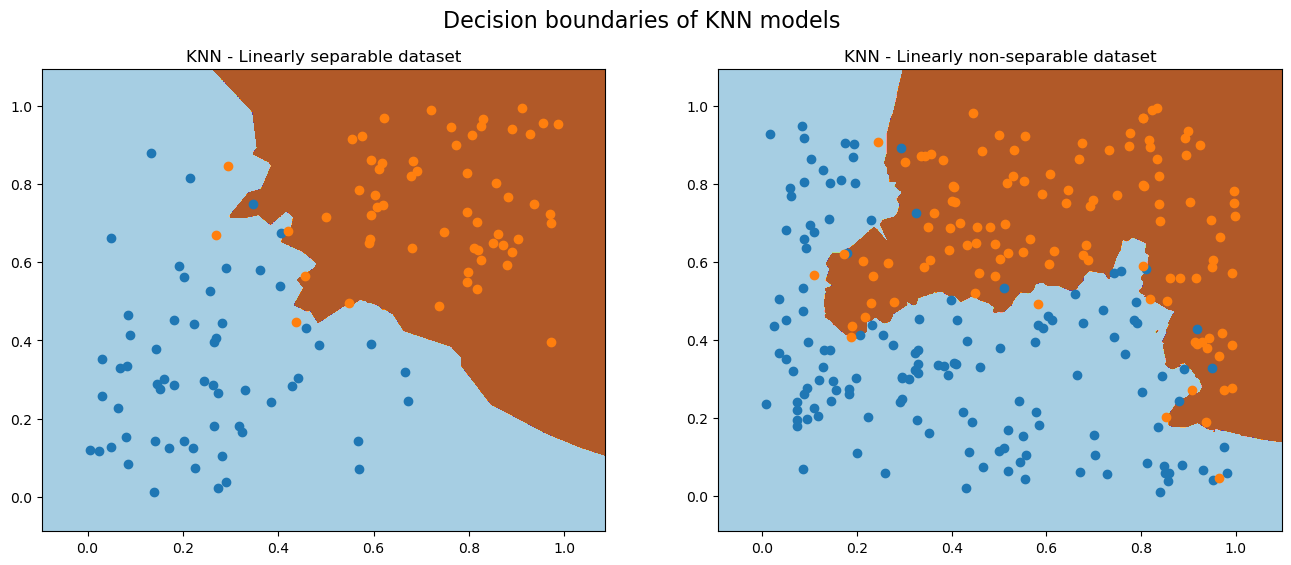

In [13]:
# Define KNN modeels with default parameters
model1 = KNeighborsClassifier(n_jobs=-1) # n_jobs=-1 means that the computation will be dispatched on all the CPUs of the computer
model2 = KNeighborsClassifier(n_jobs=-1)
# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of KNN models", fontsize=16)
# train naive bayes models
train_model(model1, x_linear, y_linear, "KNN", "Linearly separable dataset", ax1)
train_model(model2, x_nonlin, y_nonlin, "KNN", "Linearly non-separable dataset", ax2)

We can first notice that runtime of KNN in quite high for even small datasets. Decision boundaries that it is creating are quite irregular and achives high accuracy on both datasets. Now we will try to observe how decision boundaries changes, when we change the value of K. We will test this only on the linearly non-separable dataset. In results above we used default value of K=5.

Especially from the first plot we can see small "islands" of one class in another. This proves that KNN usually does not generalize well. It is very sensitive to noise and outliers. It is also very sensitive to the value of K. If we choose too small value of K, we will overfit the training data. If we choose too large value of K, we will underfit the training data.

For explanation of the bias vs variance tradeoff check materials: https://illustrated-machine-learning.github.io/#/machine-learning/bias-variance

For K=1 we will of course obtain accuracy of 100% because we are always choosing the class of example we are classifing. Because of that, to really be able to evaluate this model we will need another (test) dataset. We will learn about this in the next lecture.

Model - Linearly non-separable dataset, k=1
Accuracy: 1.0
--------------------------------------------------
Model - Linearly non-separable dataset, k=3
Accuracy: 0.9362549800796812
--------------------------------------------------
Model - Linearly non-separable dataset, k=10
Accuracy: 0.9243027888446215
--------------------------------------------------


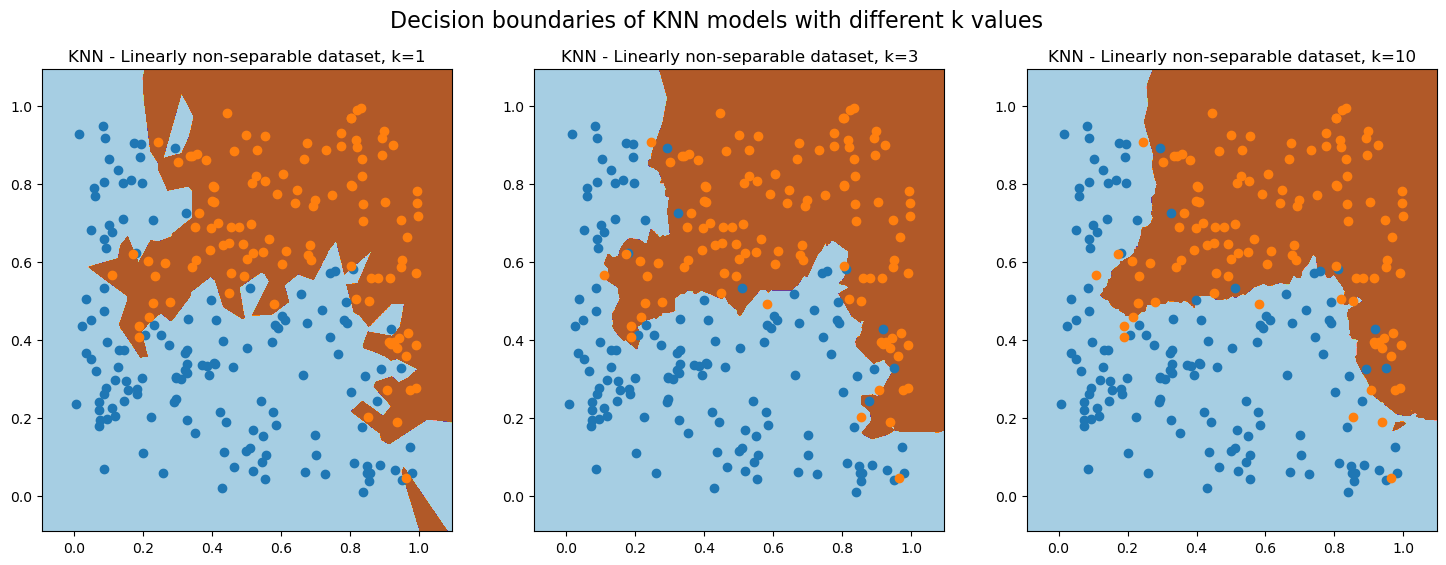

In [14]:
k = [1, 3, 10]
# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of KNN models with different k values", fontsize=16)
for i, k_val in enumerate(k):
    model = KNeighborsClassifier(n_jobs=-1, n_neighbors=k_val)
    train_model(model, x_nonlin, y_nonlin, "KNN", f"Linearly non-separable dataset, k={k_val}", axes[i])

On images above we can notice that with increasing of value for K, decision boundaries become smoother.

Now, instead of using simple voting system, we can use weighted voting system. In this case, we will weight each vote by the inverse of the distance from the new point to that training point. This means that the closest neighbors of the new point will have a much greater influence than neighbors which are further away. We will try this for value of K=5.

Model - Uniform Weights
Accuracy: 0.9322709163346613
--------------------------------------------------
Model - Distance Weights
Accuracy: 1.0
--------------------------------------------------


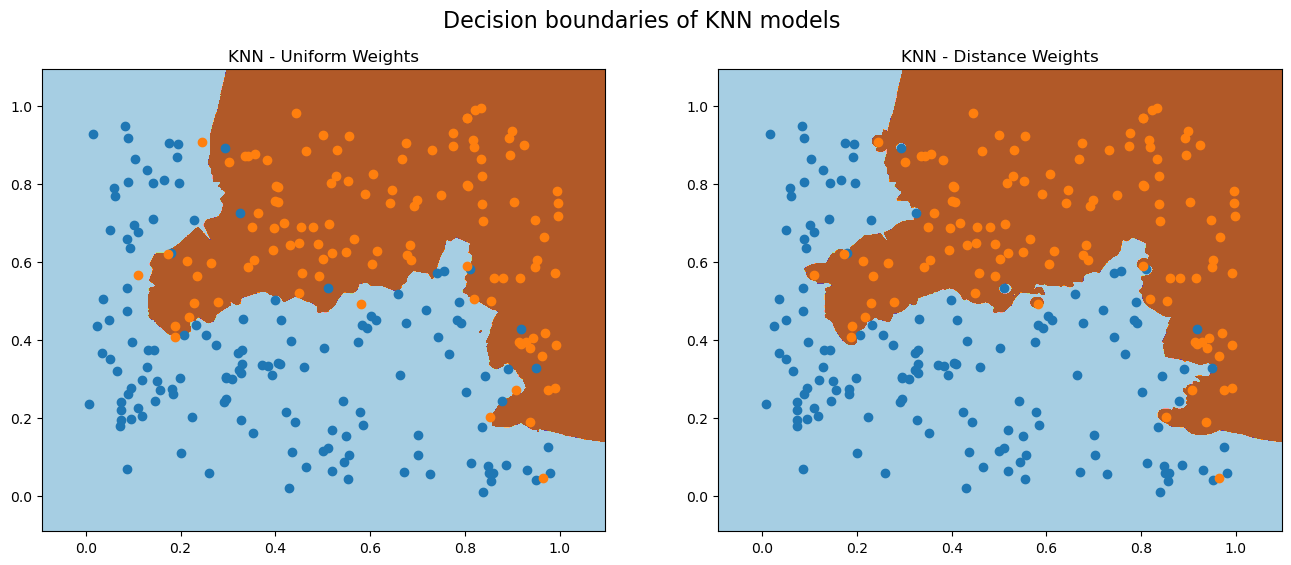

In [16]:
# Define KNN modeels with default parameters
model1 = KNeighborsClassifier(n_jobs=-1) 
model2 = KNeighborsClassifier(weights="distance", n_jobs=-1)
# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of KNN models", fontsize=16)
# train naive bayes models
train_model(model1, x_nonlin, y_nonlin, "KNN", "Uniform Weights", ax1)
train_model(model2, x_nonlin, y_nonlin, "KNN", "Distance Weights", ax2)

## Decision Trees

Check materials:
- https://illustrated-machine-learning.github.io/#/machine-learning/decision-tree
- https://scikit-learn.org/stable/modules/tree.html

Decision tree is a supervised learning algorithm that predicts the new labels by recursively splitting the predictor space into non-overlapping distinct regions.

Advantages:
 - Easy to interpret, explain and visualize
 - Requires little data preparation (no need for normalization)

Disadvantages:
 - Prone to overfitting
 - Unstable, small variations in the data might result in a completely different tree being generated
 - Decision tree learners create biased trees if some classes dominate. It is therefore recommended to balance the dataset prior to fitting with the decision tree.

Model - Linearly separable dataset
Accuracy: 1.0
--------------------------------------------------
Model - Linearly non-separable dataset
Accuracy: 1.0
--------------------------------------------------


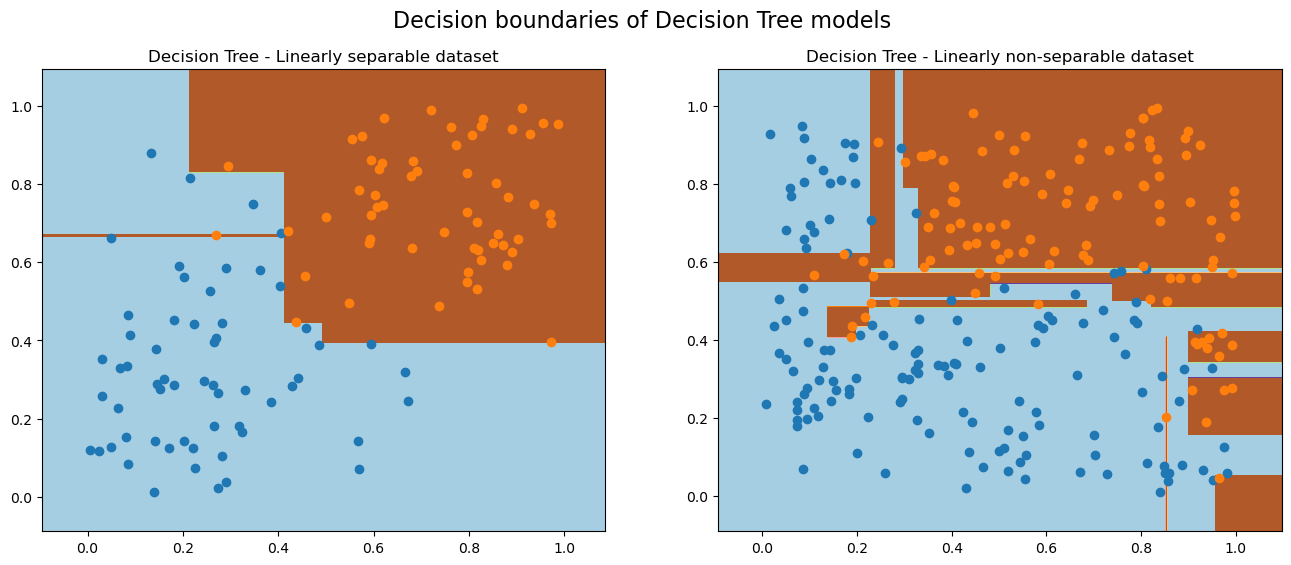

In [17]:
model1 = DecisionTreeClassifier(random_state=random_state)
model2 = DecisionTreeClassifier(random_state=random_state)

# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of Decision Tree models", fontsize=16)
# train decision tree models
train_model(model1, x_linear, y_linear, "Decision Tree", "Linearly separable dataset", ax1)
train_model(model2, x_nonlin, y_nonlin, "Decision Tree", "Linearly non-separable dataset", ax2)

We can see that decision tree model with default parameters achives perfect result on both datasets. 

But, is this really how we imagined decision boundaries? We can see that decision boundaries are very irregular and that this model is prone to overfitting. 

On the first dataset, it is visible that we have one split of the tree specifically for one example. To prevent that we will set minimum number of instances in leaf nodes to be larger.

On the second dataset, we will try to reduce overfitting by limiting the depth of the tree.

Model - Min leaf samples: 1
Accuracy: 1.0
--------------------------------------------------
Model - Min leaf samples: 2
Accuracy: 1.0
--------------------------------------------------
Model - Min leaf samples: 3
Accuracy: 0.9829059829059829
--------------------------------------------------


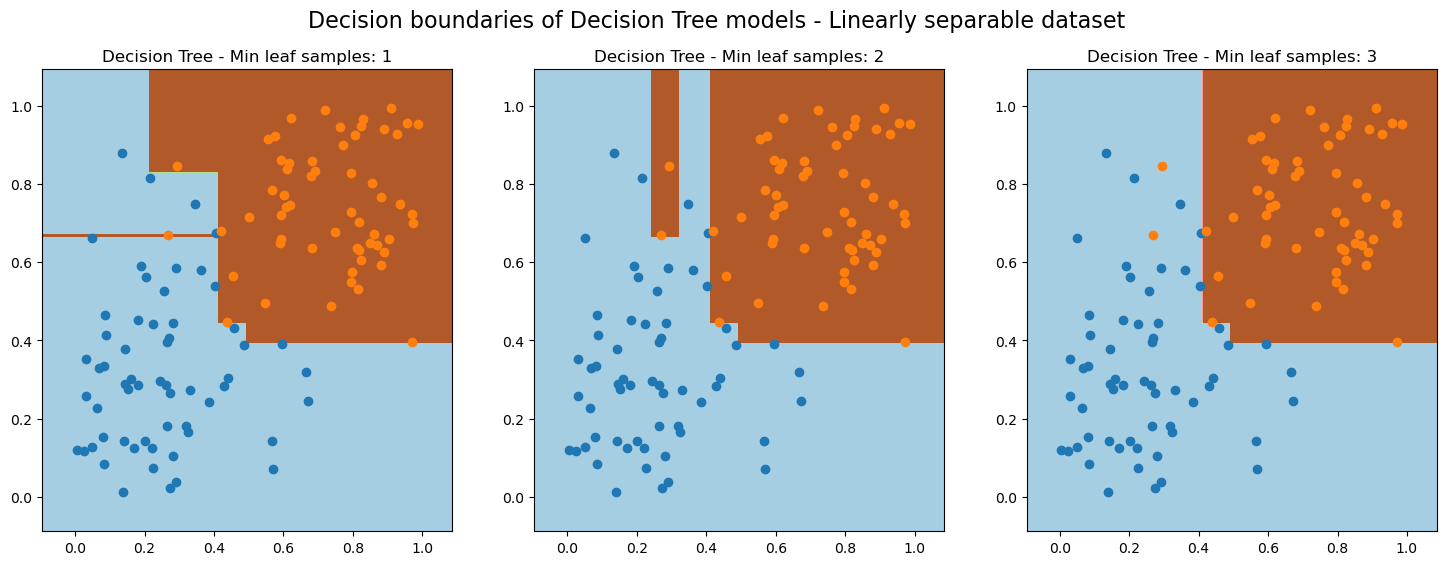

In [18]:
min_leaf_samples = [1, 2, 3]
# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of Decision Tree models - Linearly separable dataset", fontsize=16)
# train decision tree models
for i, min_samples in enumerate(min_leaf_samples):
    model = DecisionTreeClassifier(random_state=random_state, min_samples_leaf=min_samples)
    train_model(model, x_linear, y_linear, "Decision Tree", f"Min leaf samples: {min_samples}", axes[i])

Model - Max depth: 3
Accuracy: 0.9282868525896414
--------------------------------------------------
Model - Max depth: 4
Accuracy: 0.952191235059761
--------------------------------------------------
Model - Max depth: 5
Accuracy: 0.9721115537848606
--------------------------------------------------


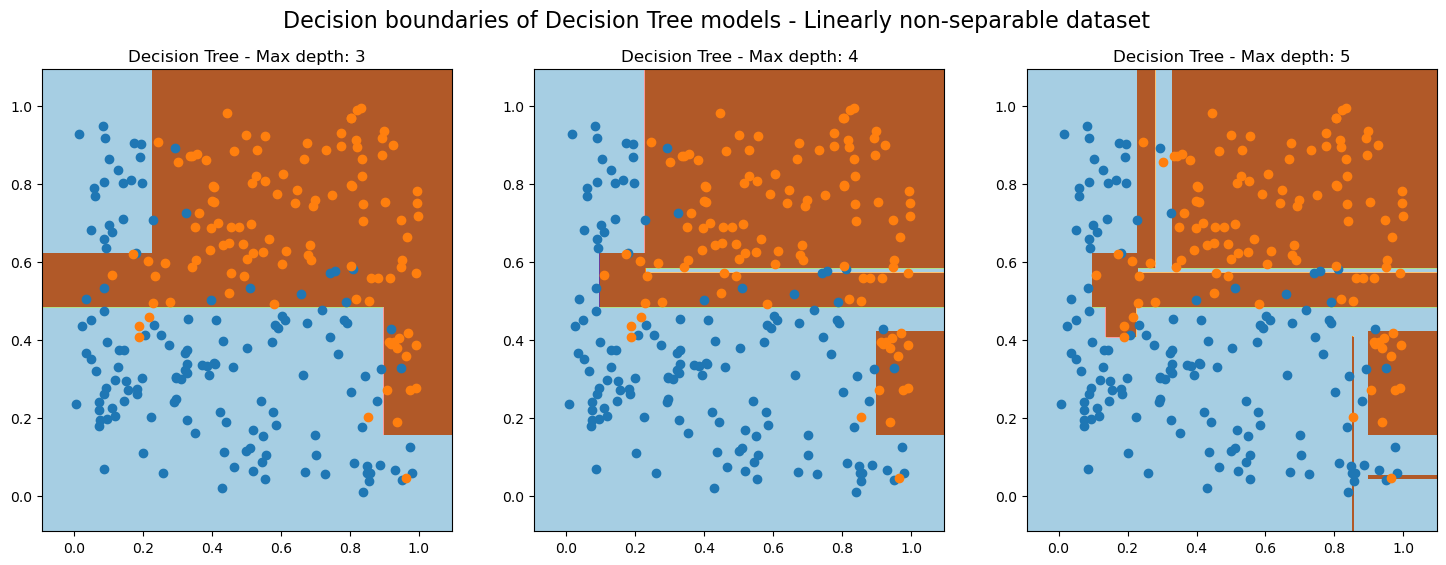

In [19]:
max_depths = [3, 4, 5]
# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of Decision Tree models - Linearly non-separable dataset", fontsize=16)
# train decision tree models
models = []
for i, max_depth in enumerate(max_depths):
    models.append(DecisionTreeClassifier(random_state=random_state, max_depth=max_depth))
    train_model(models[i], x_nonlin, y_nonlin, "Decision Tree", f"Max depth: {max_depth}", axes[i])

Decision tree model visualization of first model


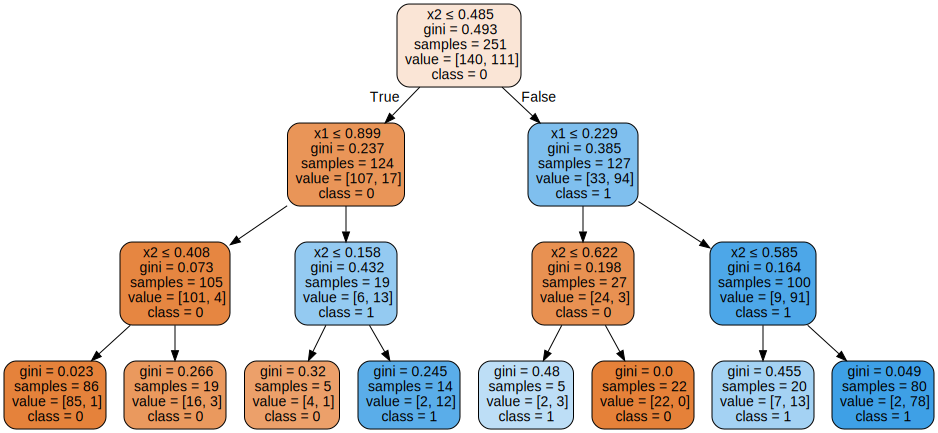

In [20]:
# Vizualization of decision tree model nodes

dot_data = export_graphviz(models[0], out_file=None, 
                     feature_names=data_linear.columns[:-1],  
                     class_names=["0", "1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data, format="png")
print("Decision tree model visualization of first model")  
graph 

Maybe the best way to control decision tree complexity is to set max_leaf_nodes parameter. This will limit the number of areas (splits) in the model, while allowing different depths of the tree.

Model - Max leaf nodes: 5
Accuracy: 0.9123505976095617
--------------------------------------------------
Model - Max leaf nodes: 10
Accuracy: 0.952191235059761
--------------------------------------------------
Model - Max leaf nodes: 20
Accuracy: 0.9760956175298805
--------------------------------------------------


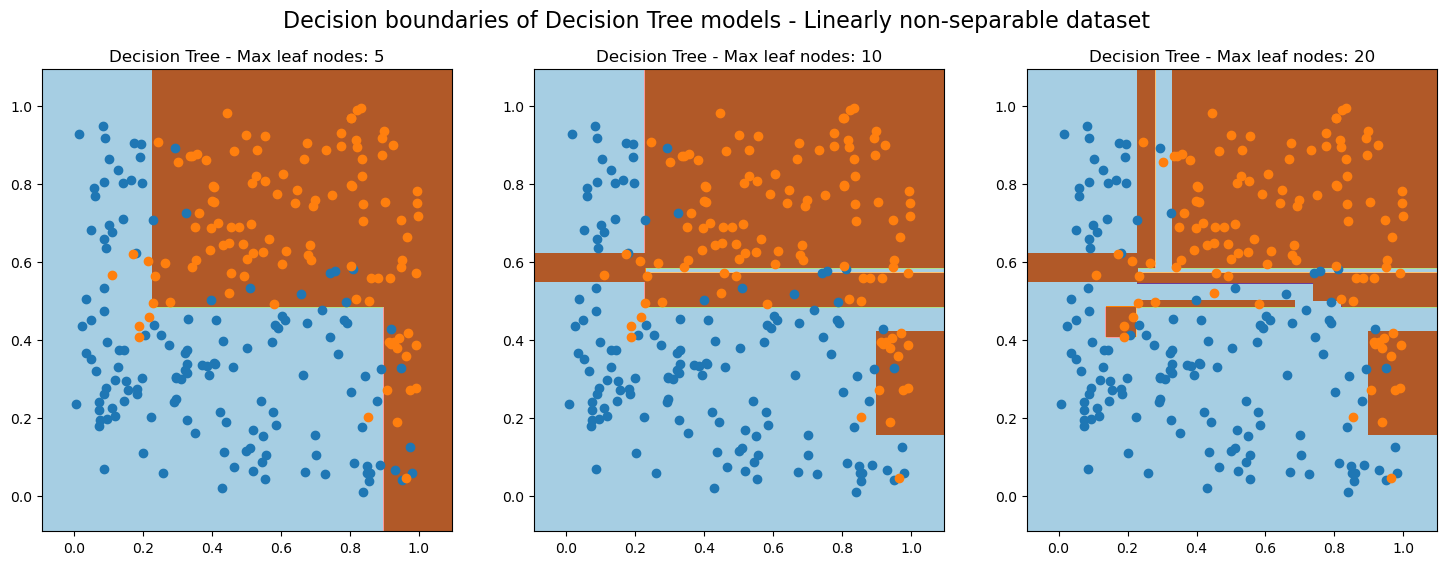

In [21]:
max_leaf_nodes = [5, 10, 20]
# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of Decision Tree models - Linearly non-separable dataset", fontsize=16)
# train decision tree models
models = []
for i, leaves in enumerate(max_leaf_nodes):
    models.append(DecisionTreeClassifier(random_state=random_state, max_leaf_nodes=leaves))
    train_model(models[i], x_nonlin, y_nonlin, "Decision Tree", f"Max leaf nodes: {leaves}", axes[i])

Decision tree model visualization of first model


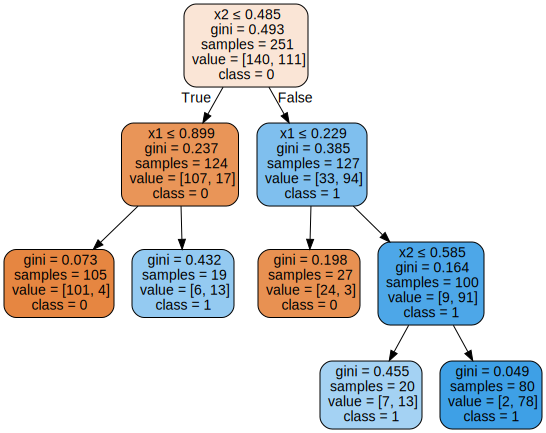

In [22]:
# Vizualization of decision tree model nodes

dot_data = export_graphviz(models[0], out_file=None, 
                     feature_names=data_linear.columns[:-1],  
                     class_names=["0", "1"],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data, format="png")
print("Decision tree model visualization of first model")  
graph 

## Ensemble Methods - Random Forest

Check materials: 
- https://illustrated-machine-learning.github.io/#/machine-learning/ensemble
- https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

Random forest is an ensemble method that uses multiple decision trees to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. It is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

Advantages:
    - Reduces overfitting in decision trees and helps to improve the accuracy
    - Works well with non-linear data

Disadvantages:
    - Slow real time prediction
    - Not so intrepretable

Model - Linearly separable dataset
Accuracy: 1.0
--------------------------------------------------
Model - Linearly non-separable dataset
Accuracy: 1.0
--------------------------------------------------


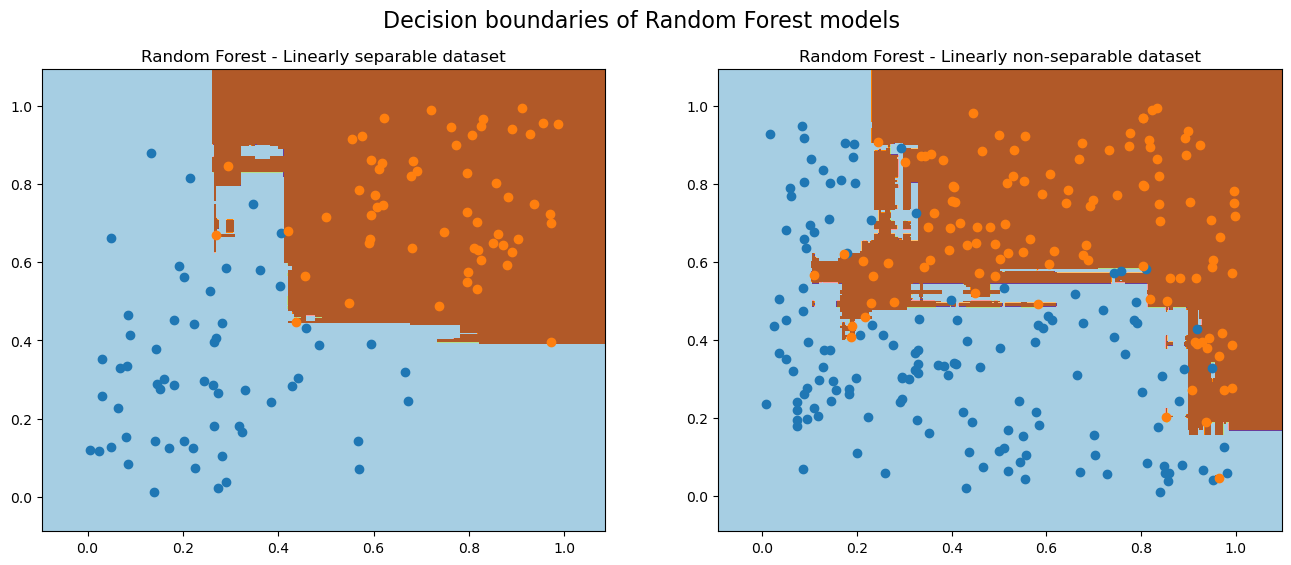

In [23]:
model1 = RandomForestClassifier(random_state=random_state)
model2 = RandomForestClassifier(random_state=random_state)

# initialize plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle("Decision boundaries of Random Forest models", fontsize=16)
# train decision tree models
train_model(model1, x_linear, y_linear, "Random Forest", "Linearly separable dataset", ax1)
train_model(model2, x_nonlin, y_nonlin, "Random Forest", "Linearly non-separable dataset", ax2)

Again with default settings, we can notice that random forest model achives perfect result on both datasets and creates very irregular decision boundaries, hence it is prone to overfitting. To mittigate this, we will try to limit the depth of the trees and number of trees in the forest (default is 100).

Model - Number of trees: 30
Accuracy: 0.9243027888446215
--------------------------------------------------
Model - Number of trees: 100
Accuracy: 0.9203187250996016
--------------------------------------------------
Model - Number of trees: 300
Accuracy: 0.9243027888446215
--------------------------------------------------


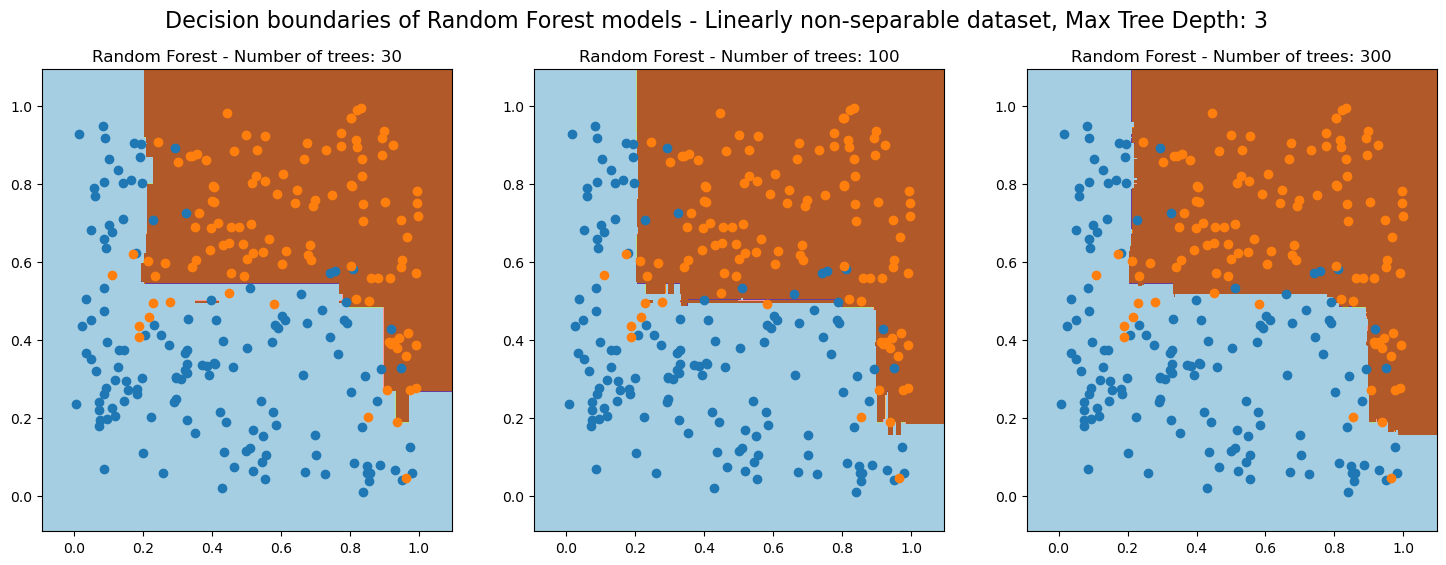

In [24]:
max_depth = 3
num_trees = [30, 100, 300]

# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of Random Forest models - Linearly non-separable dataset, Max Tree Depth: 3", fontsize=16)
# train decision tree models
for i, n in enumerate(num_trees):
    model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=random_state)
    train_model(model, x_nonlin, y_nonlin, "Random Forest", f"Number of trees: {n}", axes[i])

Model - Number of trees: 30
Accuracy: 0.9681274900398407
--------------------------------------------------
Model - Number of trees: 100
Accuracy: 0.9721115537848606
--------------------------------------------------
Model - Number of trees: 300
Accuracy: 0.9800796812749004
--------------------------------------------------


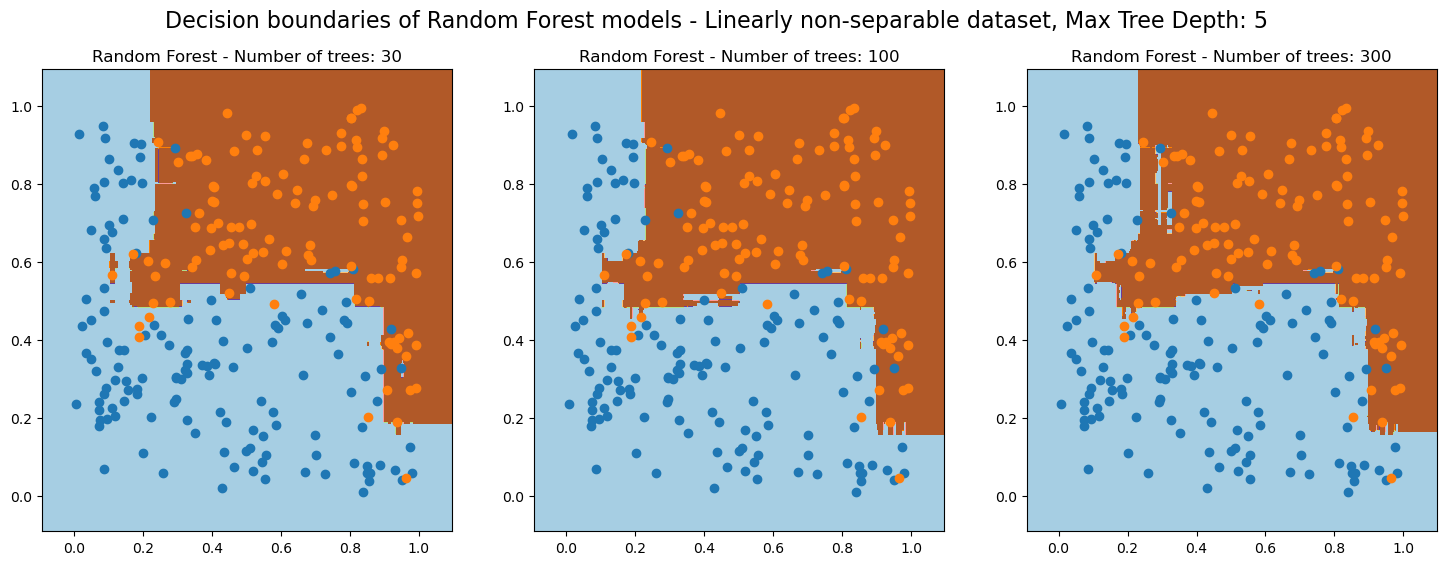

In [23]:
max_depth = 5
num_trees = [30, 100, 300]

# initialize plots
fig, axes = plt.subplots(1, len(k), figsize=(18, 6))
fig.suptitle("Decision boundaries of Random Forest models - Linearly non-separable dataset, Max Tree Depth: 5", fontsize=16)
# train decision tree models
for i, n in enumerate(num_trees):
    model = RandomForestClassifier(n_estimators=n, max_depth=max_depth, random_state=random_state)
    train_model(model, x_nonlin, y_nonlin, "Random Forest", f"Number of trees: {n}", axes[i])

We can observe that, generally increasing the number of estimators in the ensemble can improve the results. However, the improvements will start to plateau after some time, but that increases the training and inference time.

It is also noticeable that max_depth parameter has a large effect on the model performance, same way as it had on decision trees.